############################
# To Start >> RESTAURANT_SCORES #
############################

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

# 0.1. imports

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('max_colwidth', 50)
# set this if you need to

# 0.2a Get 'businesses'

In [147]:
businesses = pd.read_csv('http://localhost:8888/files/hw/data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.shape

# dtype casts the column as a specific data type

(7544, 16)

In [148]:
businesses.info()
businesses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7544 entries, 0 to 7543
Data columns (total 16 columns):
business_id             7544 non-null int64
name                    7542 non-null object
address                 7544 non-null object
city                    5778 non-null object
postal_code             7248 non-null object
latitude                4622 non-null float64
longitude               4622 non-null float64
phone_number            2173 non-null object
TaxCode                 7536 non-null object
business_certificate    6325 non-null float64
application_date        5635 non-null object
owner_name              7536 non-null object
owner_address           7522 non-null object
owner_city              7506 non-null object
owner_state             7507 non-null object
owner_zip               7480 non-null object
dtypes: float64(3), int64(1), object(12)
memory usage: 943.1+ KB


,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


# 0.2b Get 'inspections'

In [149]:
inspections = pd.read_csv('http://localhost:8888/files/hw/data/inspections_plus.csv', parse_dates=True)
inspections.shape

(27285, 4)

In [150]:
inspections.info()
inspections.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27285 entries, 0 to 27284
Data columns (total 4 columns):
business_id    27285 non-null int64
Score          15263 non-null float64
date           27285 non-null int64
type           27285 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 852.7+ KB


,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


# 0.2c Get 'violations' 

In [151]:
violations = pd.read_csv('http://localhost:8888/files/hw/data/violations_plus.csv', parse_dates=True)
violations.shape

(39720, 5)

In [152]:
violations.info()
violations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39720 entries, 0 to 39719
Data columns (total 5 columns):
business_id        39720 non-null int64
date               39720 non-null int64
ViolationTypeID    39720 non-null int64
risk_category      39710 non-null object
description        39710 non-null object
dtypes: int64(3), object(2)
memory usage: 1.5+ MB


,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


# 1) Combine the three dataframes into one data frame called restaurant_scores




# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

In [153]:
print('businesses ::  ', businesses.shape)
print('inspections :: ', inspections.shape)
print('violations ::  ', violations.shape)

businesses ::   (7544, 16)
inspections ::  (27285, 4)
violations ::   (39720, 5)


In [154]:
result = pd.merge(violations, inspections, how='left', on=['business_id', 'date'])

restaurant_scores = pd.merge(result, businesses, how='left', on=['business_id'])

In [155]:
restaurant_scores.shape

(43963, 22)

In [156]:
restaurant_scores.head()

,business_id,date,ViolationTypeID,risk_category,description,Score,type,name,address,city,...,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings,92.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...,92.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens,92.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water,94.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils,94.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104


In [157]:
restaurant_scores.info()
restaurant_scores.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43963 entries, 0 to 43962
Data columns (total 22 columns):
business_id             43963 non-null int64
date                    43963 non-null int64
ViolationTypeID         43963 non-null int64
risk_category           43951 non-null object
description             43951 non-null object
Score                   38715 non-null float64
type                    43914 non-null object
name                    43802 non-null object
address                 43802 non-null object
city                    37887 non-null object
postal_code             42847 non-null object
latitude                33465 non-null float64
longitude               33465 non-null float64
phone_number            12105 non-null object
TaxCode                 43802 non-null object
business_certificate    38919 non-null float64
application_date        32211 non-null object
owner_name              43715 non-null object
owner_address           43670 non-null object
owner_city      

business_id                 0
date                        0
ViolationTypeID             0
risk_category              12
description                12
Score                    5248
type                       49
name                      161
address                   161
city                     6076
postal_code              1116
latitude                10498
longitude               10498
phone_number            31858
TaxCode                   161
business_certificate     5044
application_date        11752
owner_name                248
owner_address             293
owner_city                346
owner_state               353
owner_zip                 451
dtype: int64

# 2) Which ten business have had the most inspections?

In [158]:
# most_inspections = restaurant_scores.groupby('business_id').sort(restaurant_scores.date.count_values, ascending = False)

# most_inspections = restaurant_scores.date.sort_values(inplace = False, ascending = False).value_counts()

# most_inspections.business_id.sort_values(by=restaurant_scores.date.value_counts(), inplace = True)
# most_inspections.head(20)

restaurant_scores.groupby(['business_id', 'name'])['date'].value_counts().sort_values(ascending = False).head(15)

business_id  name                          date    
77693        SH Dream Inc                  20150223    36
3016         R & G Executive Lounge, Inc   20131218    33
74084        Miss Saigon                   20141217    30
10332        Harvest Urban Market          20131101    27
10238        King of Thai Noodle House     20160128    27
82134        Harbor Villa Restaurant       20150427    24
71385        Yama Sushi Restaurant         20130429    24
80591        L & G Vietnamese Sandwich     20160129    24
63082        The Brick Yard                20140606    24
26340        VIP Coffee & Cake Shop        20150513    24
85925        New Heng Fung Inc             20151216    24
74522        Dick Lee Pastry               20131003    24
2945         New Sun Hong Kong Restaurant  20150921    24
4608         Gourmet Kitchen               20130722    24
67330        San Tung Restaurant LLC       20150929    24
Name: date, dtype: int64

# 3) Group and count the inspections by type

In [159]:
# restaurant_scores['ViolationTypeID'].value_counts()

# restaurant_scores.groupby(['ViolationTypeID'])['description']['ViolationTypeID'].value_counts()

restaurant_scores.groupby(['description'])['ViolationTypeID'].value_counts().sort_values(ascending = False)

description                                                                ViolationTypeID
Unclean or degraded floors walls or ceilings                               103154             3757
Moderate risk food holding temperature                                     103120             2873
Inadequate and inaccessible handwashing facilities                         103119             2701
Unapproved or unmaintained equipment or utensils                           103144             2610
Wiping cloths not clean or properly stored or inadequate sanitizer         103149             2514
Unclean nonfood contact surfaces                                           103142             2470
Inadequately cleaned or sanitized food contact surfaces                    103124             2458
Improper food storage                                                      103139             2345
Foods not protected from contamination                                     103133             2039
High risk food hol

# 4) Create a plot that shows number of inspections per month  
>> dunno

In [160]:
# import time

# restaurant_scores['string_date'] = restaurant_scores.date.apply(str)
# restaurant_scores['date_time'] = time.strptime(restaurant_scores.string_date, '%Y%m%e')
# restaurant_scores['date_time']

In [161]:
# restaurant_scores.groupby(['month'])['date'].value_counts().sort_values(ascending = False)

# **Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap
>> can't get above to work

# 5) Which zip code contains the most high risk violations?

In [162]:
restaurant_scores['postal_code'][restaurant_scores.risk_category == 'High Risk'].value_counts().head()

# restaurant_scores.groupby(['risk_category'])['postal_code'].restaurant_scores.business_id.value_counts()

# restaurant_scores.groupby(['risk_category'])['postal_code'].value_counts()

# restaurant_scores.groupby(['postal_code'])[restaurant_scores.business_id['risk_category == 'High Risk']].value_counts().sort_values(ascending = False)

94133    618
94103    569
94110    557
94122    460
94109    459
Name: postal_code, dtype: int64

# 6) If inspection is prompted by a change in restaurant ownership, is the inspection more likely to be categorized as higher or lower risk?

In [163]:
# restaurant_scores.type.value_counts().sort_values(ascending = False)

# restaurant_scores.groupby(['type'])['risk_category'].value_counts()

restaurant_scores[restaurant_scores.type == 'New Ownership']['risk_category'].value_counts()

Low Risk         553
Moderate Risk    419
High Risk        148
Name: risk_category, dtype: int64

# 7) Examining the descriptions, what is the most common violation?

In [164]:
restaurant_scores.groupby(['description'])['ViolationTypeID'].value_counts().sort_values(ascending = False).head()

description                                                         ViolationTypeID
Unclean or degraded floors walls or ceilings                        103154             3757
Moderate risk food holding temperature                              103120             2873
Inadequate and inaccessible handwashing facilities                  103119             2701
Unapproved or unmaintained equipment or utensils                    103144             2610
Wiping cloths not clean or properly stored or inadequate sanitizer  103149             2514
Name: ViolationTypeID, dtype: int64

# 8 Create a hist of the scores with 10 bins

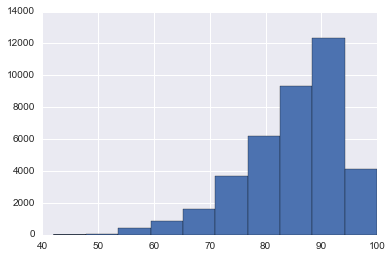

In [165]:
restaurant_scores.Score.hist(bins=10)

# 9) Can you predict risk category based on the other features in this dataset?
>>> nope

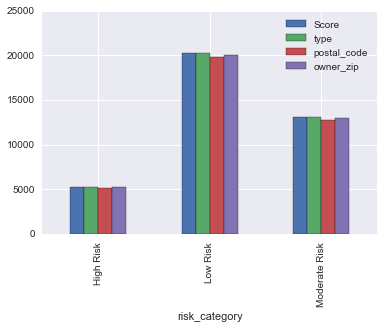

In [166]:
# first look

predict = restaurant_scores[np.isfinite(restaurant_scores['Score'])]

predict.groupby('risk_category')['Score', 'type', 'postal_code', 'owner_zip'].count().plot(kind = 'bar')

In [167]:
# knn?
from sklearn.neighbors import KNeighborsClassifier  # import class

X, y = predict.drop('risk_category', axis = 1), predict['risk_category']

knn = KNeighborsClassifier(n_neighbors=3)           # instantiate the estimator
knn.fit(X, y)                                       # fit with data
knn.score(X, y)

ValueError: could not convert string to float: '94025-2240'

# 10) Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

############################
# A Little More Morbid >> KILLINGS #
############################

# 0.1) imports

In [ ]:
killings = pd.read_csv('http://localhost:8888/files/hw/data/police-killings.csv')
killings.info()
killings.head(50)

# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

In [ ]:
killings = killings.rename(columns = {'lawenforcementagency' : 'agency', 'raceethnicity' : 'race' })
killings.info()
killings.head()

# 2. Show the count of missing values in each column

In [ ]:
killings.isnull().sum()

# 3. replace each null value in the dataframe with the string "Unknown"

In [ ]:
killings.fillna('Unknown', inplace = True)
killings.info()

killings.isnull().sum()

# 4. How many killings were there so far in 2015?

In [ ]:
killings.year.value_counts()

# 5. Of all killings, how many were male and how many female?

In [ ]:
killings.gender.value_counts()

# 6. How many killings were of unarmed people?

In [ ]:
killings.armed.value_counts()

#  == 102

# 7. What percentage of all killings were unarmed?

In [ ]:
percent_unarmed = (killings.armed[killings.armed == 'No'].value_counts() / killings.armed.count() ) * 100

percent_unarmed

# 8. What are the 5 states with the most killings?

In [ ]:
killings.state.value_counts().sort_values(ascending = False).head(10)

# 9. Show a value counts of deaths for each race

In [ ]:
killings.race.value_counts().sort_values(ascending = False)

# 10. Display a histogram of ages of all killings

In [ ]:
killings.age.mean()

In [ ]:
killings.age.hist(bins = 20)

# 11. Show 6 histograms of ages by race

In [ ]:
killings.age.hist(by=killings.race)

# 12. What is the average age of death by race?

In [ ]:
killings.groupby(killings.race)['age'].mean().sort_values(ascending = False)

# 13. Show a bar chart with counts of deaths every month

In [ ]:
killings.groupby(['month']).age.count().plot(kind = 'bar')

###################
# Less Morbid >> MAJORS #
###################

# 0.1) imports

In [168]:
majors = pd.read_csv('./data/college-majors.csv')

majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [169]:
majors.columns = [each.replace(' ','_').lower() for each in majors.columns]
majors.head()

,unnamed:_0,major_code,major,major_category,total,employed,employed_full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


# 1. Delete the columns (employed_full_time_year_round, major_code)

In [170]:
majors = majors.drop('major_code', 1)
majors = majors.drop('employed_full_time_year_round', 1)
majors.head()

,unnamed:_0,major,major_category,total,employed,unemployed,unemployment_rate,median,p25th,p75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


# 2. Show the count of missing values in each column

In [171]:
majors.isnull().sum()

# looks like every column has full non-null items

unnamed:_0           0
major                0
major_category       0
total                0
employed             0
unemployed           0
unemployment_rate    0
median               0
p25th                0
p75th                0
dtype: int64

# 3. What are the top 10 highest paying majors?

In [172]:
# median

# majors.gro[['major', 'median']].mean().sort_values(by = 'median', ascending = False).head(12)

majors.groupby('major')['p25th', 'median', 'p75th'].mean().sort_values(by = 'median', ascending = False)[:10]

,p25th,median,p75th
major,,,
PETROLEUM ENGINEERING,75000,125000,210000.0
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION,78000,106000,125000.0
NAVAL ARCHITECTURE AND MARINE ENGINEERING,60000,97000,125000.0
METALLURGICAL ENGINEERING,65000,96000,123000.0
NUCLEAR ENGINEERING,65000,95000,128000.0
MINING AND MINERAL ENGINEERING,52000,92000,124000.0
MATHEMATICS AND COMPUTER SCIENCE,53000,92000,136000.0
ELECTRICAL ENGINEERING,60000,88000,116000.0
CHEMICAL ENGINEERING,60000,86000,120000.0


# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

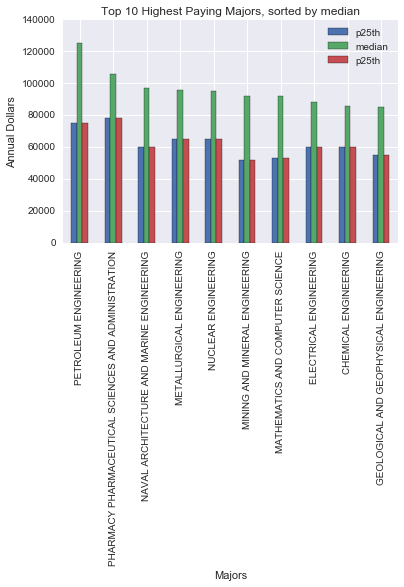

In [173]:
majors.groupby('major')['p25th', 'median', 'p25th'].mean().sort_values(by = 'median', ascending = False)[:10].plot(kind = 'bar')
plt.title('Top 10 Highest Paying Majors, sorted by median')
plt.xlabel('Majors')
plt.ylabel('Annual Dollars')

# 5. What is the average median salary for each major category?

In [174]:
majors.groupby('major_category')['p25th', 'median', 'p75th'].median().sort_values(by = 'median', ascending = False)[:10]

,p25th,median,p75th
major_category,,,
Engineering,50000,75000,102000.0
Computers & Mathematics,43000,66000,95000.0
Business,40000,60000,90000.0
Physical Sciences,39500,60000,90000.0
Agriculture & Natural Resources,36550,53000,80000.0
Social Science,38000,52000,78000.0
Biology & Life Science,33000,51500,77500.0
Communications & Journalism,34500,50000,77500.0
Health,35000,50000,75000.0


# 6. Show only the top 5 paying major categories

In [175]:
majors.groupby('major_category')['p25th', 'median', 'p75th'].median().sort_values(by = 'median', ascending = False)[:5]

,p25th,median,p75th
major_category,,,
Engineering,50000,75000,102000.0
Computers & Mathematics,43000,66000,95000.0
Business,40000,60000,90000.0
Physical Sciences,39500,60000,90000.0
Agriculture & Natural Resources,36550,53000,80000.0


# 7. Plot a histogram of the distribution of median salaries

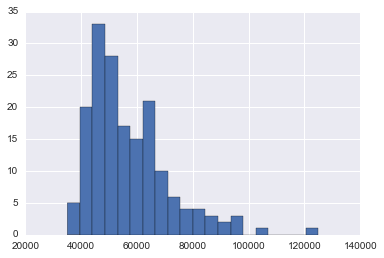

In [176]:
majors['median'].hist(bins = 20)

# 8. Plot a histogram of the distribution of median salaries by major category

major_category
Agriculture & Natural Resources        Axes(0.125,0.125;0.775x0.775)
Arts                                   Axes(0.125,0.125;0.775x0.775)
Biology & Life Science                 Axes(0.125,0.125;0.775x0.775)
Business                               Axes(0.125,0.125;0.775x0.775)
Communications & Journalism            Axes(0.125,0.125;0.775x0.775)
Computers & Mathematics                Axes(0.125,0.125;0.775x0.775)
Education                              Axes(0.125,0.125;0.775x0.775)
Engineering                            Axes(0.125,0.125;0.775x0.775)
Health                                 Axes(0.125,0.125;0.775x0.775)
Humanities & Liberal Arts              Axes(0.125,0.125;0.775x0.775)
Industrial Arts & Consumer Services    Axes(0.125,0.125;0.775x0.775)
Interdisciplinary                      Axes(0.125,0.125;0.775x0.775)
Law & Public Policy                    Axes(0.125,0.125;0.775x0.775)
Physical Sciences                      Axes(0.125,0.125;0.775x0.775)
Psychology & Social

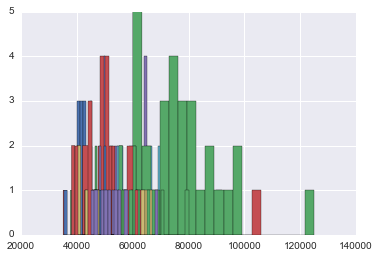

In [177]:
majors.groupby('major_category')['median'].hist(bins = 20)

# 9. What are the top 10 most UNemployed majors?

In [178]:
majors.groupby('major')['unemployed'].mean().sort_values(ascending = False)

major
BUSINESS MANAGEMENT AND ADMINISTRATION                               147261
GENERAL BUSINESS                                                      85626
PSYCHOLOGY                                                            79066
ACCOUNTING                                                            75379
COMMUNICATIONS                                                        54390
ENGLISH LANGUAGE AND LITERATURE                                       52248
MARKETING AND MARKETING RESEARCH                                      51839
POLITICAL SCIENCE AND GOVERNMENT                                      40376
GENERAL EDUCATION                                                     38742
BIOLOGY                                                               36757
NURSING                                                               36503
CRIMINAL JUSTICE AND FIRE PROTECTION                                  35037
ECONOMICS                                                             34974
COMPUT

# 9.1 What are the unemployment rates?

In [179]:
majors.groupby('major')['unemployment_rate'].mean().sort_values(ascending = False)[:10]

major
MISCELLANEOUS FINE ARTS                     0.156147
CLINICAL PSYCHOLOGY                         0.102712
MILITARY TECHNOLOGIES                       0.101796
SCHOOL STUDENT COUNSELING                   0.101746
LIBRARY SCIENCE                             0.094843
VISUAL AND PERFORMING ARTS                  0.094658
COMPUTER PROGRAMMING AND DATA PROCESSING    0.090264
SOCIAL PSYCHOLOGY                           0.087336
ASTRONOMY AND ASTROPHYSICS                  0.086022
ARCHITECTURE                                0.085991
Name: unemployment_rate, dtype: float64

# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

In [180]:
majors.groupby('major_category')['unemployed'].mean().sort_values(ascending = False)[:10]

major_category
Business                       33415.153846
Communications & Journalism    25299.750000
Social Science                 14683.333333
Arts                           13015.625000
Humanities & Liberal Arts      11942.400000
Psychology & Social Work       11578.444444
Law & Public Policy             8609.800000
Education                       7833.500000
Computers & Mathematics         7270.363636
Health                          6251.083333
Name: unemployed, dtype: float64

# 10.1 What are the unemployment rates?

In [181]:
majors.groupby('major_category')['unemployment_rate'].mean().sort_values(ascending = False)[:10]

major_category
Arts                                   0.087601
Psychology & Social Work               0.077867
Interdisciplinary                      0.077269
Humanities & Liberal Arts              0.069429
Communications & Journalism            0.069125
Law & Public Policy                    0.067854
Social Science                         0.065686
Computers & Mathematics                0.059437
Industrial Arts & Consumer Services    0.058546
Physical Sciences                      0.054541
Name: unemployment_rate, dtype: float64

# 11. the total and employed column refer to the people that were surveyed.
## Create a new column showing the employment rate of the people surveyed for each major
## - call it "sample_employment_rate"



## - Example the first row has total: 128148 and employed: 90245. 
## - Its sample_employment_rate should be 90245.0 / 128148.0 = .7042

In [182]:
majors['sample_employment_rate'] = majors.employed / majors.total
majors.head()

,unnamed:_0,major,major_category,total,employed,unemployed,unemployment_rate,median,p25th,p75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738


# 12. Create a "sample_unemployment_rate" column
## this column should be - "sample_unemployment_rate"

In [183]:
majors['sample_unemployment_rate'] = majors.unemployed / majors.total
majors.head()

,unnamed:_0,major,major_category,total,employed,unemployed,unemployment_rate,median,p25th,p75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.018908
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.023771
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.024179
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.034950
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.036820


# << 13??>> Determine % of non-responders about sample employment

In [187]:
majors['sample_non_responder_rate'] = (majors.total - (majors.employed + majors.unemployed)) / majors.total
majors.head()

,unnamed:_0,major,major_category,total,employed,unemployed,unemployment_rate,median,p25th,p75th,sample_employment_rate,sample_unemployment_rate,sample_non_responders,sample_non_responder_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.018908,0.276867,0.276867
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.023771,0.169891,0.169891
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.024179,0.200648,0.200648
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.034950,0.181103,0.181103
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.036820,0.251442,0.251442
